In [1]:
import csv
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1500)
pd.set_option('display.width', 1000)

Reading in the cleaned DataFrame with added features.

In [3]:
cancer = pd.read_csv('cancer_ml3.csv', index_col=['Geography'])

In [4]:
cancer.shape

(3047, 236)

In [5]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3047 entries, Abbeville County, South Carolina to Zavala County, Texas
Columns: 236 entries, avgAnnCount to PercentMarried_log
dtypes: bool(66), float64(129), int64(41)
memory usage: 4.2+ MB


In [6]:
cancer.head()

,avgAnnCount,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,PctSomeCol18_24_isnull,PctEmployed16_Over_isnull,PctPrivateCoverageAlone_isnull,age_gt_100,household_lt_1,"binnedInc_(34218.1, 37413.8]","binnedInc_(37413.8, 40362.7]","binnedInc_(40362.7, 42724.4]","binnedInc_(42724.4, 45201]","binnedInc_(45201, 48021.6]","binnedInc_(48021.6, 51046.4]","binnedInc_(51046.4, 54545.6]","binnedInc_(54545.6, 61494.5]","binnedInc_(61494.5, 125635]","binnedInc_[22640, 34218.1]",ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,utmda_l1,mskcc_l1,mayo_l1,hopkins_l1,dfb_l1,cleveland_l1,upmcps_l1,hlmcc_l1,mgs_l1,nw_mem_l1,chi_l1,nyc_l1,atlanta_l1,dallas_l1,denver_l1,los_ang_l1,seattle_l1,san_fran_l1,utmda_l2,mskcc_l2,mayo_l2,hopkins_l2,dfb_l2,cleveland_l2,upmcps_l2,hlmcc_l2,mgs_l2,nw_mem_l2,chi_l2,nyc_l2,atlanta_l2,dallas_l2,denver_l2,los_ang_l2,seattle_l2,san_fran_l2,onc_min_distsl1,onc_min_distsl2,city_min_distsl1,city_min_distsl2,sc_min_dists_l1,sc_min_dists_l2,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10,PCT_LACCESS_POP10_isnull,PCT_LACCESS_LOWI10_isnull,PCT_LACCESS_CHILD10_isnull,PCT_LACCESS_SENIORS10_isnull,PCT_LACCESS_HHNV10_isnull,FOODINSEC_00_02,FOODINSEC_07_09,FOODINSEC_10_12,CH_FOODINSEC_02_12,CH_FOODINSEC_09_12,VLFOODSEC_00_02,VLFOODSEC_07_09,VLFOODSEC_10_12,CH_VLFOODSEC_02_12,CH_VLFOODSEC_09_12,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11,FOODINSEC_00_02_isnull,FOODINSEC_07_09_isnull,FOODINSEC_10_12_isnull,CH_FOODINSEC_02_12_isnull,CH_FOODINSEC_09_12_isnull,VLFOODSEC_00_02_isnull,VLFOODSEC_07_09_isnull,VLFOODSEC_10_12_isnull,CH_VLFOODSEC_02_12_isnull,CH_VLFOODSEC_09_12_isnull,FOODINSEC_CHILD_01_07_isnull,FOODINSEC_CHILD_03_11_isnull,PCT_LOCLFARM07,PCT_LOCLSALE07,PC_DIRSALES07,FMRKT09,FMRKT13,PCH_FMRKT_09_13,FMRKTPTH09,FMRKTPTH13,PCH_FMRKTPTH_09_13,PCT_FMRKT_SNAP13,PCT_FMRKT_WIC13,PCT_FMRKT_WICCASH13,PCT_FMRKT_SFMNP13,PCT_FRMKT_FRVEG13,PCT_FRMKT_ANMLPROD13,PCT_FMRKT_OTHER13,VEG_FARMS07,VEG_ACRES07,VEG_ACRESPTH07,FRESHVEG_FARMS07,FRESHVEG_ACRES07,FRESHVEG_ACRESPTH07,ORCHARD_FARMS07,ORCHARD_ACRES07,ORCHARD_ACRESPTH07,BERRY_FARMS07,BERRY_ACRES07,BERRY_ACRESPTH07,SLHOUSE07,GHVEG_FARMS07,GHVEG_SQFT07,GHVEG_SQFTPTH07,FOODHUB12,CSA07,AGRITRSM_OPS07,AGRITRSM_RCT07,FARM_TO_SCHOOL,PCT_LOCLFARM07_isnull,PCT_LOCLSALE07_isnull,PC_DIRSALES07_isnull,FMRKT09_isnull,FMRKT13_isnull,PCH_FMRKT_09_13_isnull,FMRKTPTH09_isnull,FMRKTPTH13_isnull,PCH_FMRKTPTH_09_13_isnull,PCT_FMRKT_SNAP13_isnull,PCT_FMRKT_WIC13_isnull,PCT_FMRKT_WICCASH13_isnull,PCT_FMRKT_SFMNP13_isnull,PCT_FRMKT_FRVEG13_isnull,PCT_FRMKT_ANMLPROD13_isnull,PCT_FMRKT_OTHER13_isnull,VEG_FARMS07_isnull,VEG_ACRES07_isnull,VEG_ACRESPTH07_isnull,FRESHVEG_FARMS07_isnull,FRESHVEG_ACRES07_isnull,FRESHVEG_ACRESPTH07_isnull,ORCHARD_FARMS07_isnull,ORCHARD_ACRES07_isnull,ORCHARD_ACRESPTH07_isnull,BERRY_FARMS07_isnull,BERRY_ACRES07_isnull,BERRY_ACRESPTH07_isnull,SLHOUSE07_isnull,GHVEG_FARMS07_isnull,GHVEG_SQFT07_isnull,GHVEG_SQFTPTH07_isnull,FOODHUB12_isnull,CSA07_isnull,AGRITRSM_OPS07_isnull,AGRITRSM_RCT07_isnull,FARM_TO_SCHOOL_isnull,PCT_DIABETES_ADULTS09,PCT_DIABETES_ADULTS10,PCT_OBESE_ADULTS09,PCT_OBESE_ADULTS10,PCT_OBESE_ADULTS13,PCT_OBESE_CHILD08,PCT_OBESE_CHILD11,PCH_OBESE_CHILD_08_11,PCT_HSPA09,RECFAC07,RECFAC12,PCH_RECFAC_07_12,RECFACPTH07,RECFACPTH12,PCH_RECFACPTH_07_12,NATAMEN,PCT_OBESE_CHILD08_isnull,PCT_OBESE_CHILD11_isnull,PCH_OBESE_CHILD_08_11_isnull,PCT_HSPA09_isnull,PCH_RECFAC_07_12_isnull,PCH_RECFACPTH_07_12_isnull,NATAMEN_isnull,PERPOV10,CHILDPOVRATE10,PERCHLDPOV10,METRO13,POPLOSS00,avgAnnCount_sqrd,medIncome_sqrd,popEst2015_sqrd,povertyPercent_lo

In [7]:
cancer.describe()

,avgAnnCount,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,"binnedInc_(34218.1, 37413.8]","binnedInc_(37413.8, 40362.7]","binnedInc_(40362.7, 42724.4]","binnedInc_(42724.4, 45201]","binnedInc_(45201, 48021.6]","binnedInc_(48021.6, 51046.4]","binnedInc_(51046.4, 54545.6]","binnedInc_(54545.6, 61494.5]","binnedInc_(61494.5, 125635]","binnedInc_[22640, 34218.1]",ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,utmda_l1,mskcc_l1,mayo_l1,hopkins_l1,dfb_l1,cleveland_l1,upmcps_l1,hlmcc_l1,mgs_l1,nw_mem_l1,chi_l1,nyc_l1,atlanta_l1,dallas_l1,denver_l1,los_ang_l1,seattle_l1,san_fran_l1,utmda_l2,mskcc_l2,mayo_l2,hopkins_l2,dfb_l2,cleveland_l2,upmcps_l2,hlmcc_l2,mgs_l2,nw_mem_l2,chi_l2,nyc_l2,atlanta_l2,dallas_l2,denver_l2,los_ang_l2,seattle_l2,san_fran_l2,onc_min_distsl1,onc_min_distsl2,city_min_distsl1,city_min_distsl2,sc_min_dists_l1,sc_min_dists_l2,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10,FOODINSEC_00_02,FOODINSEC_07_09,FOODINSEC_10_12,CH_FOODINSEC_02_12,CH_FOODINSEC_09_12,VLFOODSEC_00_02,VLFOODSEC_07_09,VLFOODSEC_10_12,CH_VLFOODSEC_02_12,CH_VLFOODSEC_09_12,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11,PCT_LOCLFARM07,PCT_LOCLSALE07,PC_DIRSALES07,FMRKT09,FMRKT13,PCH_FMRKT_09_13,FMRKTPTH09,FMRKTPTH13,PCH_FMRKTPTH_09_13,PCT_FMRKT_SNAP13,PCT_FMRKT_WIC13,PCT_FMRKT_WICCASH13,PCT_FMRKT_SFMNP13,PCT_FRMKT_FRVEG13,PCT_FRMKT_ANMLPROD13,PCT_FMRKT_OTHER13,VEG_FARMS07,VEG_ACRES07,VEG_ACRESPTH07,FRESHVEG_FARMS07,FRESHVEG_ACRES07,FRESHVEG_ACRESPTH07,ORCHARD_FARMS07,ORCHARD_ACRES07,ORCHARD_ACRESPTH07,BERRY_FARMS07,BERRY_ACRES07,BERRY_ACRESPTH07,SLHOUSE07,GHVEG_FARMS07,GHVEG_SQFT07,GHVEG_SQFTPTH07,FOODHUB12,CSA07,AGRITRSM_OPS07,AGRITRSM_RCT07,FARM_TO_SCHOOL,PCT_DIABETES_ADULTS09,PCT_DIABETES_ADULTS10,PCT_OBESE_ADULTS09,PCT_OBESE_ADULTS10,PCT_OBESE_ADULTS13,PCT_OBESE_CHILD08,PCT_OBESE_CHILD11,PCH_OBESE_CHILD_08_11,PCT_HSPA09,RECFAC07,RECFAC12,PCH_RECFAC_07_12,RECFACPTH07,RECFACPTH12,PCH_RECFACPTH_07_12,NATAMEN,PERPOV10,CHILDPOVRATE10,PERCHLDPOV10,METRO13,POPLOSS00,avgAnnCount_sqrd,medIncome_sqrd,popEst2015_sqrd,povertyPercent_log,studyPerCap_sqrd,MedianAge_log,MedianAgeFemale_sqrd,PercentMarried_log
count,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3

In [8]:
cancer.columns

Index(['avgAnnCount', 'TARGET_deathRate', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale',
       ...
       'METRO13', 'POPLOSS00', 'avgAnnCount_sqrd', 'medIncome_sqrd', 'popEst2015_sqrd', 'povertyPercent_log', 'studyPerCap_sqrd', 'MedianAge_log', 'MedianAgeFemale_sqrd', 'PercentMarried_log'], dtype='object', length=236)

Checking for duplicate rows in the DataFrame

In [9]:
cancer = cancer.drop_duplicates()
cancer.shape

(3047, 236)

Checking for variables with missing values, using both the .isnull().sum() and .isna().sum() chained methods.

A list of all the columns with missing values is called.

In [10]:
null_value_columns = list(cancer.columns[(cancer.isnull().sum()>0) | (cancer.isna().sum()>0)])
null_value_columns

[]

## Mining Logarithmic and Exponential Transformations of the Feature Set for Increased Accuracy

The next series of cells looks for extra information left in the feature set that the model won't be able utilize in a linear fashion to make a good fit. This can be done by looking for non-linear patterns in plots of the actual values of each individual feature and the actual target variable values, overlaid with plots of the actual values of each individual feature against the predicted target variable values. Additionally, a plot of the actual values of each individual feature and the residuals will be executed. Logarithmic and exponential versions of each feature will be investigated for their contribution to the predictive power of the model. 

In [11]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [12]:
lr = linear_model.LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
y = cancer['TARGET_deathRate']

In [14]:
target_name = ['TARGET_deathRate']
X = cancer[[cn for cn in cancer.columns if cn not in target_name]]

In [15]:
X.columns

Index(['avgAnnCount', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       ...
       'METRO13', 'POPLOSS00', 'avgAnnCount_sqrd', 'medIncome_sqrd', 'popEst2015_sqrd', 'povertyPercent_log', 'studyPerCap_sqrd', 'MedianAge_log', 'MedianAgeFemale_sqrd', 'PercentMarried_log'], dtype='object', length=235)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
lr.score(X_test, y_test)

0.5597104092993461

## 'PctHS25_Over': Percent of county residents ages 25 and over highest education attained: high school diploma

In [22]:
X16 = np.array(cancer['PctHS25_Over'])
X16 = X16.reshape(-1, 1)

In [23]:
lr.fit(X16, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
lr.score(X16, y)

0.16369232024158198

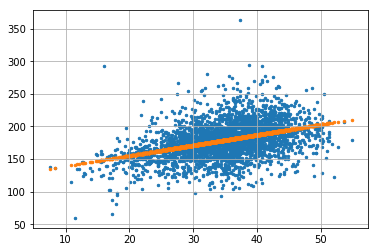

In [25]:
plt.scatter(X16, y, s=6)
plt.scatter(X16, lr.predict(X16), s=6)
plt.grid()

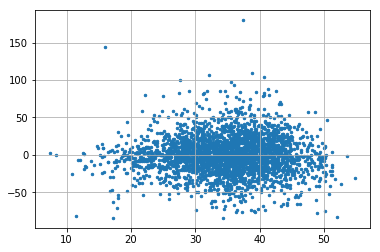

In [26]:
plt.scatter(X16, y - lr.predict(X16), s=6)
plt.grid()

In [27]:
X16.shape

(3047, 1)

In [28]:
dfx16 = pd.DataFrame(X16)
dfx16.head()

,0
0,37.5
1,39.2
2,39.9
3,21.4
4,44.7


In [29]:
dfx16['PctHS25_Over_log'] = np.log(X16)

In [30]:
dfx16.head()

,0,PctHS25_Over_log
0,37.5,3.624341
1,39.2,3.668677
2,39.9,3.686376
3,21.4,3.063391
4,44.7,3.799974


In [31]:
lr.fit(dfx16, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
lr.score(dfx16, y)

0.16967782794367925

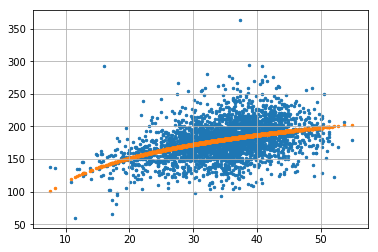

In [33]:
plt.scatter(X16, y, s=6) 
plt.scatter(X16, lr.predict(dfx16), s=6)
plt.grid()

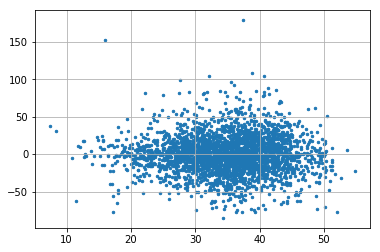

In [34]:
plt.scatter(X16, y - lr.predict(dfx16), s=6)
plt.grid()

In [35]:
dfx16['PctHS25_Over_sqrd'] = X16**2

In [36]:
dfx16.head()

,0,PctHS25_Over_log,PctHS25_Over_sqrd
0,37.5,3.624341,1406.25
1,39.2,3.668677,1536.64
2,39.9,3.686376,1592.01
3,21.4,3.063391,457.96
4,44.7,3.799974,1998.09


In [37]:
lr.fit(dfx16, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
lr.score(dfx16, y)

0.1718617103669573

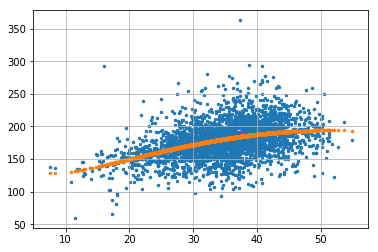

In [39]:
plt.scatter(X16, y, s=6) 
plt.scatter(X16, lr.predict(dfx16), s=6)
plt.grid()

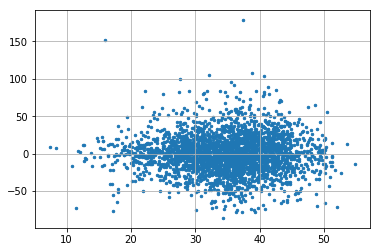

In [40]:
plt.scatter(X16, y - lr.predict(dfx16), s=6)
plt.grid()

In [41]:
X['PctHS25_Over_log'] = np.log(X['PctHS25_Over'])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
lr.score(X_test, y_test)

0.5586537144803696

The logarithmic version results in a decrease in accuracy, so it is dropped from X.

In [45]:
X = X.drop(columns = 'PctHS25_Over_log')

In [46]:
X['PctHS25_Over_log_sqrd'] = X['PctHS25_Over']**2

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
lr.score(X_test, y_test)

0.5586648694368794

The squared version decreased the accuracy, so it is dropped from X.

In [50]:
X = X.drop(columns = 'PctHS25_Over_log_sqrd')

## 'PctBachDeg25_Over': Percent of county residents ages 25 and over highest education attained: bachelor's degree 

In [51]:
X17 = np.array(cancer['PctBachDeg25_Over'])
X17 = X17.reshape(-1, 1)

In [52]:
lr.fit(X17, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
lr.score(X17, y)

0.23568822637766929

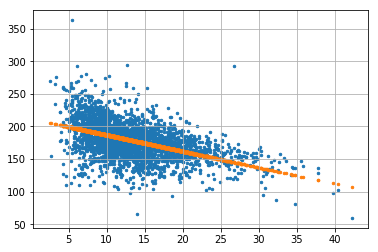

In [54]:
plt.scatter(X17, y, s=6)
plt.scatter(X17, lr.predict(X17), s=6)
plt.grid()

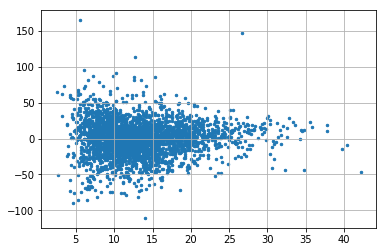

In [55]:
plt.scatter(X17, y - lr.predict(X17), s=6)
plt.grid()

In [56]:
X17.shape

(3047, 1)

In [57]:
dfx17 = pd.DataFrame(X17)
dfx17.head()

,0
0,8.6
1,7.6
2,11.0
3,24.8
4,11.9


In [58]:
dfx17['PctBachDeg25_Over_log'] = np.log(X17)

In [59]:
dfx17.head()

,0,PctBachDeg25_Over_log
0,8.6,2.151762
1,7.6,2.028148
2,11.0,2.397895
3,24.8,3.210844
4,11.9,2.476538


In [60]:
lr.fit(dfx17, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
lr.score(dfx17, y)

0.2469098237954399

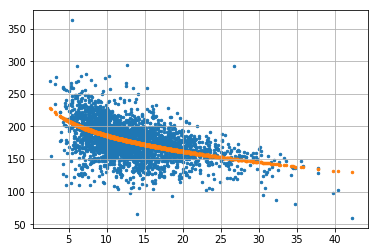

In [62]:
plt.scatter(X17, y, s=6) 
plt.scatter(X17, lr.predict(dfx17), s=6)
plt.grid()

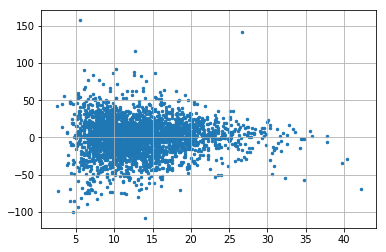

In [63]:
plt.scatter(X17, y - lr.predict(dfx17), s=6)
plt.grid()

In [64]:
dfx17['PctBachDeg25_Over_sqrd'] = X17**2

In [65]:
dfx17.head()

,0,PctBachDeg25_Over_log,PctBachDeg25_Over_sqrd
0,8.6,2.151762,73.96
1,7.6,2.028148,57.76
2,11.0,2.397895,121.00
3,24.8,3.210844,615.04
4,11.9,2.476538,141.61


In [66]:
lr.fit(dfx17, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
lr.score(dfx17, y)

0.24869056906805884

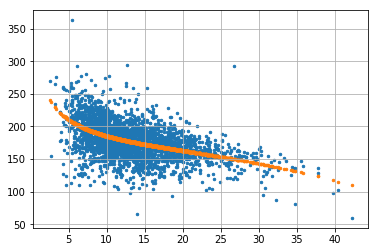

In [68]:
plt.scatter(X17, y, s=6) 
plt.scatter(X17, lr.predict(dfx17), s=6)
plt.grid()

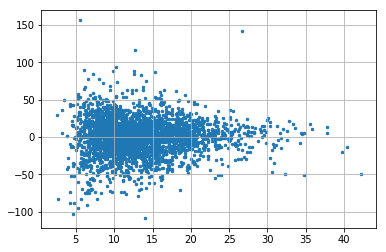

In [69]:
plt.scatter(X17, y - lr.predict(dfx17), s=6)
plt.grid()

In [70]:
X['PctBachDeg25_Over_log'] = np.log(X['PctBachDeg25_Over'])

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
lr.score(X_test, y_test)

0.5538179839709564

The logarithmic version decreased the accuracy score, so it is dropped from X.

In [74]:
X = X.drop(columns = 'PctBachDeg25_Over_log')

In [75]:
X['PctBachDeg25_Over_sqrd'] = X['PctBachDeg25_Over']**2

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
lr.score(X_test, y_test)

0.5576708385456188

The squared version decreased the accuracy, so it dropped from X.

In [79]:
X = X.drop(columns = 'PctBachDeg25_Over_sqrd')

## 'PctEmployed16_Over': Percent of county residents ages 16 and over employed

In [80]:
X18 = np.array(cancer['PctEmployed16_Over'])
X18 = X18.reshape(-1, 1)

In [81]:
lr.fit(X18, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [82]:
lr.score(X18, y)

0.15795262447594127

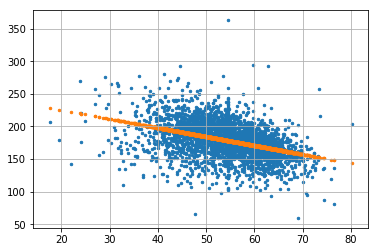

In [83]:
plt.scatter(X18, y, s=6)
plt.scatter(X18, lr.predict(X18), s=6)
plt.grid()

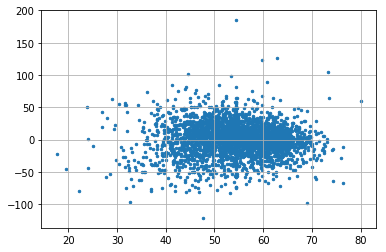

In [84]:
plt.scatter(X18, y - lr.predict(X18), s=6)
plt.grid()

In [85]:
X18.shape

(3047, 1)

In [86]:
dfx18 = pd.DataFrame(X18)
dfx18.head()

,0
0,45.9
1,52.0
2,53.1
3,61.9
4,62.5


In [87]:
dfx18['PctEmployed16_Over_log'] = np.log(X18)

In [88]:
dfx18.head()

,0,PctEmployed16_Over_log
0,45.9,3.826465
1,52.0,3.951244
2,53.1,3.972177
3,61.9,4.125520
4,62.5,4.135167


In [89]:
lr.fit(dfx18, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
lr.score(dfx18, y)

0.16705772711118516

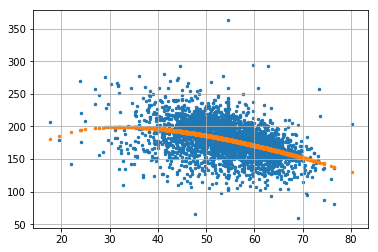

In [91]:
plt.scatter(X18, y, s=6) 
plt.scatter(X18, lr.predict(dfx18), s=6)
plt.grid()

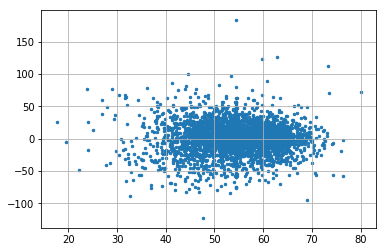

In [92]:
plt.scatter(X18, y - lr.predict(dfx18), s=6)
plt.grid()

In [93]:
dfx18['PctEmployed16_Over_sqrd'] = X18**2

In [94]:
dfx18.head()

,0,PctEmployed16_Over_log,PctEmployed16_Over_sqrd
0,45.9,3.826465,2106.81
1,52.0,3.951244,2704.00
2,53.1,3.972177,2819.61
3,61.9,4.125520,3831.61
4,62.5,4.135167,3906.25


In [95]:
lr.fit(dfx18, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [96]:
lr.score(dfx18, y)

0.16765028462541276

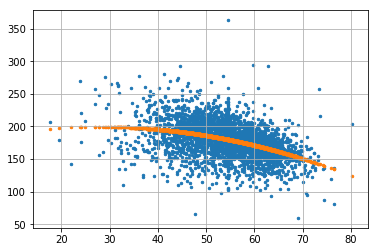

In [97]:
plt.scatter(X18, y, s=6) 
plt.scatter(X18, lr.predict(dfx18), s=6)
plt.grid()

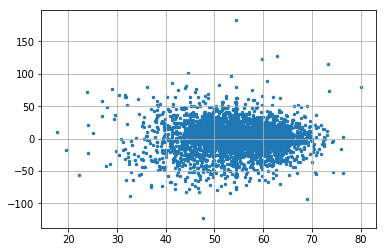

In [98]:
plt.scatter(X18, y - lr.predict(dfx18), s=6)
plt.grid()

In [99]:
X['PctEmployed16_Over_log'] = np.log(X['PctEmployed16_Over'])

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
lr.score(X_test, y_test)

0.5628349682484609

The logarithmic version increased the accuracy, so it is added to the core feature set.

In [103]:
cancer['PctEmployed16_Over_log'] = np.log(cancer['PctEmployed16_Over'])

In [104]:
X['PctEmployed16_Over_sqrd'] = X['PctEmployed16_Over']**2

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [107]:
lr.score(X_test, y_test)

0.5600942157712363

The squared version decreased the accuracy, so it is dropped from X.

In [108]:
X = X.drop(columns = 'PctEmployed16_Over_sqrd')

## 'PctUnemployed16_Over': Percent of county residents ages 16 and over unemployed

In [109]:
X19 = np.array(cancer['PctUnemployed16_Over'])
X19 = X19.reshape(-1, 1)

In [110]:
lr.fit(X19, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [111]:
lr.score(X19, y)

0.14319597636555592

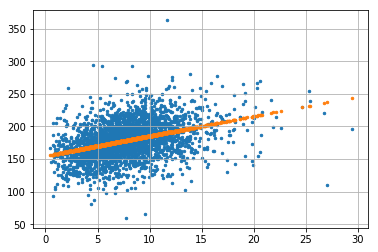

In [112]:
plt.scatter(X19, y, s=6)
plt.scatter(X19, lr.predict(X19), s=6)
plt.grid()

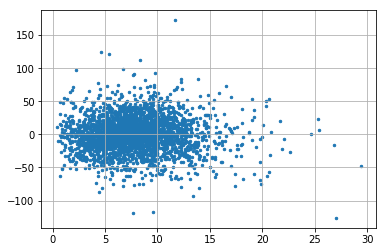

In [113]:
plt.scatter(X19, y - lr.predict(X19), s=6)
plt.grid()

In [114]:
X19.shape

(3047, 1)

In [115]:
dfx19 = pd.DataFrame(X19)
dfx19.head()

,0
0,10.7
1,10.1
2,6.8
3,6.6
4,3.2


In [116]:
dfx19['PctUnemployed16_Over_log'] = np.log(X19)

In [117]:
dfx19.head()

,0,PctUnemployed16_Over_log
0,10.7,2.370244
1,10.1,2.312535
2,6.8,1.916923
3,6.6,1.887070
4,3.2,1.163151


In [118]:
lr.fit(dfx19, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [119]:
lr.score(dfx19, y)

0.14678260135280297

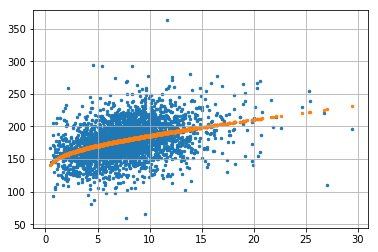

In [120]:
plt.scatter(X19, y, s=6) 
plt.scatter(X19, lr.predict(dfx19), s=6)
plt.grid()

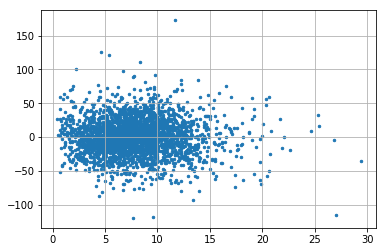

In [121]:
plt.scatter(X19, y - lr.predict(dfx19), s=6)
plt.grid()

In [122]:
dfx19['PctUnemployed16_Over_sqrd'] = X19**2

In [123]:
dfx19.head()

,0,PctUnemployed16_Over_log,PctUnemployed16_Over_sqrd
0,10.7,2.370244,114.49
1,10.1,2.312535,102.01
2,6.8,1.916923,46.24
3,6.6,1.887070,43.56
4,3.2,1.163151,10.24


In [124]:
lr.fit(dfx19, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [125]:
lr.score(dfx19, y)

0.15237411215016627

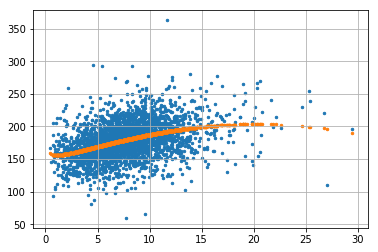

In [126]:
plt.scatter(X19, y, s=6) 
plt.scatter(X19, lr.predict(dfx19), s=6)
plt.grid()

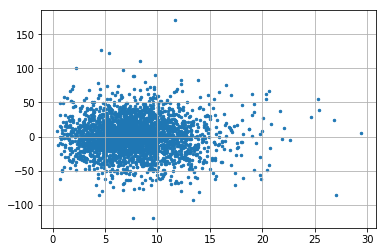

In [127]:
plt.scatter(X19, y - lr.predict(dfx19), s=6)
plt.grid()

In [128]:
X['PctUnemployed16_Over_log'] = np.log(X['PctUnemployed16_Over'])

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [131]:
lr.score(X_test, y_test)

0.5613366924370422

The logarithmic version decreased the accuracy, so it is removed from X.

In [132]:
X = X.drop(columns = 'PctUnemployed16_Over_log')

In [133]:
X['PctUnemployed16_Over_sqrd'] = X['PctUnemployed16_Over']**2

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [136]:
lr.score(X_test, y_test)

0.5649414749444615

The squared version increased the accuracy, so it is added to the core feature set.

In [137]:
cancer['PctUnemployed16_Over_sqrd'] = cancer['PctUnemployed16_Over']**2

## 'PctPrivateCoverage': Percent of county residents with private health coverage

In [138]:
X20 = np.array(cancer['PctPrivateCoverage'])
X20 = X20.reshape(-1, 1)

In [139]:
lr.fit(X20, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [140]:
lr.score(X20, y)

0.1490465755051258

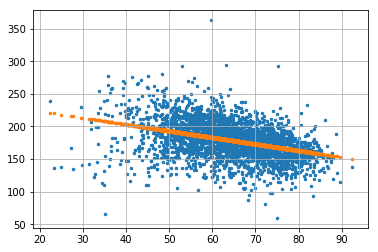

In [141]:
plt.scatter(X20, y, s=6)
plt.scatter(X20, lr.predict(X20), s=6)
plt.grid()

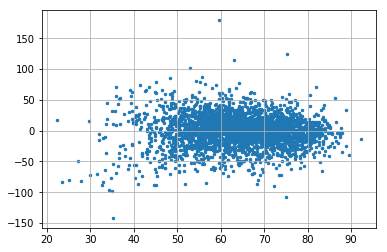

In [142]:
plt.scatter(X20, y - lr.predict(X20), s=6)
plt.grid()

In [143]:
X20.shape

(3047, 1)

In [144]:
dfx20 = pd.DataFrame(X20)
dfx20.head()

,0
0,56.6
1,56.5
2,61.8
3,76.1
4,75.5


In [145]:
dfx20['PctPrivateCoverage_log'] = np.log(X20)

In [146]:
dfx20.head()

,0,PctPrivateCoverage_log
0,56.6,4.036009
1,56.5,4.034241
2,61.8,4.123903
3,76.1,4.332048
4,75.5,4.324133


In [147]:
lr.fit(dfx20, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [148]:
lr.score(dfx20, y)

0.16638631963880068

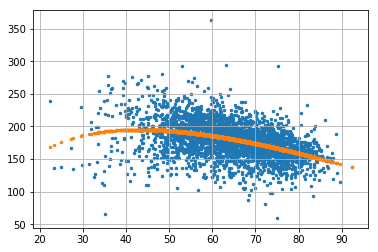

In [149]:
plt.scatter(X20, y, s=6) 
plt.scatter(X20, lr.predict(dfx20), s=6)
plt.grid()

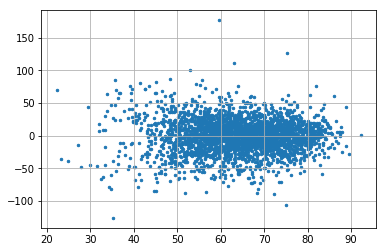

In [150]:
plt.scatter(X20, y - lr.predict(dfx20), s=6)
plt.grid()

In [151]:
dfx20['PctPrivateCoverage_sqrd'] = X20**2

In [152]:
dfx20.head()

,0,PctPrivateCoverage_log,PctPrivateCoverage_sqrd
0,56.6,4.036009,3203.56
1,56.5,4.034241,3192.25
2,61.8,4.123903,3819.24
3,76.1,4.332048,5791.21
4,75.5,4.324133,5700.25


In [153]:
lr.fit(dfx20, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [154]:
lr.score(dfx20, y)

0.16705511729932954

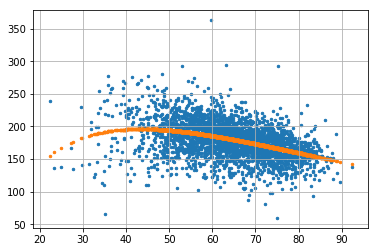

In [155]:
plt.scatter(X20, y, s=6) 
plt.scatter(X20, lr.predict(dfx20), s=6)
plt.grid()

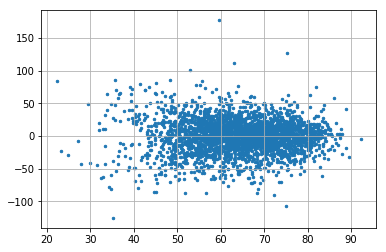

In [156]:
plt.scatter(X20, y - lr.predict(dfx20), s=6)
plt.grid()

In [157]:
X['PctPrivateCoverage_log'] = np.log(X['PctPrivateCoverage'])

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [160]:
lr.score(X_test, y_test)

0.5743806657999206

The log version increased the accuracy, so it is added to the core feature set.

In [161]:
cancer['PctPrivateCoverage_log'] = np.log(cancer['PctPrivateCoverage'])

In [162]:
X['PctPrivateCoverage_sqrd'] = X['PctPrivateCoverage']**2

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [166]:
lr.score(X_test, y_test)

0.5753064845431082

The squared version increases accuracy, so it is added to the core feature set.

In [167]:
cancer['PctPrivateCoverage_sqrd'] = cancer['PctPrivateCoverage']**2

## 'PctPrivateCoverageAlone': Percent of county residents with private health coverage alone (no public assistance)

In [168]:
X21 = np.array(cancer['PctPrivateCoverageAlone'])
X21 = X21.reshape(-1, 1)

In [169]:
lr.fit(X21, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [170]:
lr.score(X21, y)

0.10640318323426046

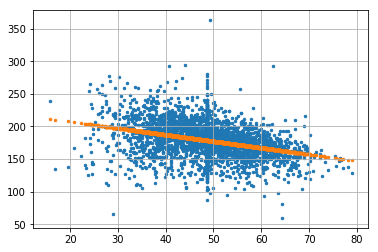

In [171]:
plt.scatter(X21, y, s=6)
plt.scatter(X21, lr.predict(X21), s=6)
plt.grid()

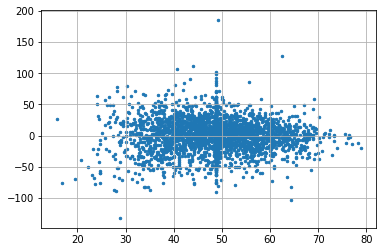

In [172]:
plt.scatter(X21, y - lr.predict(X21), s=6)
plt.grid()

In [173]:
X21.shape

(3047, 1)

In [174]:
dfx21 = pd.DataFrame(X21)
dfx21.head()

,0
0,41.8
1,44.6
2,43.9
3,48.7
4,53.0


In [175]:
dfx21['PctPrivateCoverageAlone_log'] = np.log(X21)

In [176]:
dfx21.head()

,0,PctPrivateCoverageAlone_log
0,41.8,3.732896
1,44.6,3.797734
2,43.9,3.781914
3,48.7,3.885679
4,53.0,3.970292


In [177]:
lr.fit(dfx21, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [178]:
lr.score(dfx21, y)

0.11342348819652139

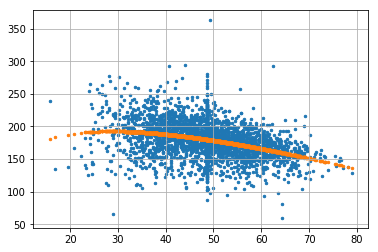

In [179]:
plt.scatter(X21, y, s=6) 
plt.scatter(X21, lr.predict(dfx21), s=6)
plt.grid()

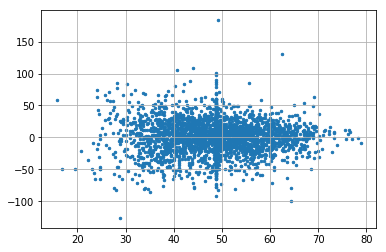

In [180]:
plt.scatter(X21, y - lr.predict(dfx21), s=6)
plt.grid()

In [181]:
dfx21['PctPrivateCoverageAlone_sqrd'] = X21**2

In [182]:
dfx21.head()

,0,PctPrivateCoverageAlone_log,PctPrivateCoverageAlone_sqrd
0,41.8,3.732896,1747.24
1,44.6,3.797734,1989.16
2,43.9,3.781914,1927.21
3,48.7,3.885679,2371.69
4,53.0,3.970292,2809.00


In [183]:
lr.fit(dfx21, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [184]:
lr.score(dfx21, y)

0.11381662616615108

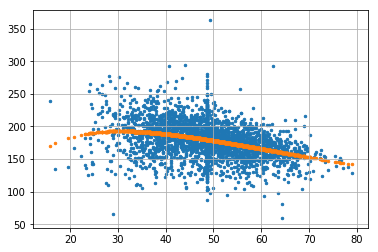

In [185]:
plt.scatter(X21, y, s=6) 
plt.scatter(X21, lr.predict(dfx21), s=6)
plt.grid()

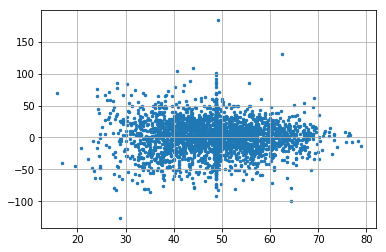

In [186]:
plt.scatter(X21, y - lr.predict(dfx21), s=6)
plt.grid()

In [187]:
X['PctPrivateCoverageAlone_log'] = np.log(X['PctPrivateCoverageAlone'])

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [189]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [190]:
lr.score(X_test, y_test)

0.5746932318218447

The logarithmic version decreased the accuracy, so it is dropped from X.

In [191]:
X = X.drop(columns = 'PctPrivateCoverageAlone_log')

In [192]:
X['PctPrivateCoverageAlone_sqrd'] = X['PctPrivateCoverageAlone']**2

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [194]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [195]:
lr.score(X_test, y_test)

0.5734172804790256

The squared version also decreased the accuracy as well, so it is dropped from X.

In [196]:
X = X.drop(columns = 'PctPrivateCoverageAlone_sqrd')

## 'PctEmpPrivCoverage': Percent of county residents with employee-provided private health coverage

In [197]:
X22 = np.array(cancer['PctEmpPrivCoverage'])
X22 = X22.reshape(-1, 1)

In [198]:
lr.fit(X22, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [199]:
lr.score(X22, y)

0.07150245418052914

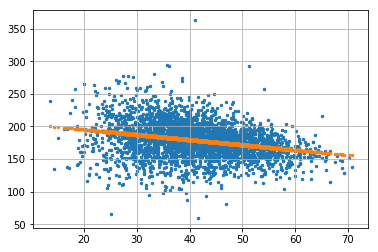

In [200]:
plt.scatter(X22, y, s=6)
plt.scatter(X22, lr.predict(X22), s=6)
plt.grid()

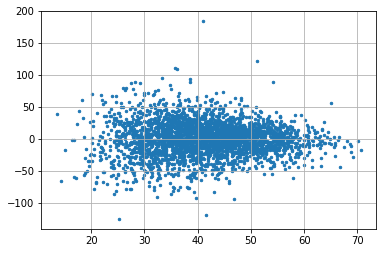

In [201]:
plt.scatter(X22, y - lr.predict(X22), s=6)
plt.grid()

In [202]:
X22.shape

(3047, 1)

In [203]:
dfx22 = pd.DataFrame(X22)
dfx22.head()

,0
0,37.6
1,38.9
2,37.3
3,53.6
4,43.4


In [204]:
dfx22['PctEmpPrivCoverage_log'] = np.log(X22)

In [205]:
dfx22.head()

,0,PctEmpPrivCoverage_log
0,37.6,3.627004
1,38.9,3.660994
2,37.3,3.618993
3,53.6,3.981549
4,43.4,3.770459


In [206]:
lr.fit(dfx22, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [207]:
lr.score(dfx22, y)

0.07734874802472125

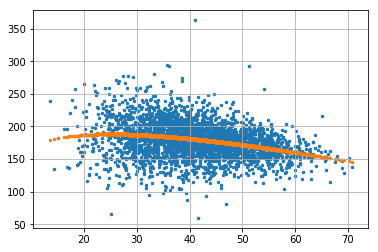

In [208]:
plt.scatter(X22, y, s=6) 
plt.scatter(X22, lr.predict(dfx22), s=6)
plt.grid()

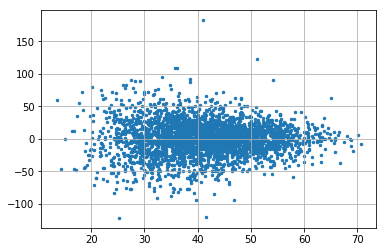

In [209]:
plt.scatter(X22, y - lr.predict(dfx22), s=6)
plt.grid()

In [210]:
dfx22['PctEmpPrivCoverage_sqrd'] = X22**2

In [211]:
dfx22.head()

,0,PctEmpPrivCoverage_log,PctEmpPrivCoverage_sqrd
0,37.6,3.627004,1413.76
1,38.9,3.660994,1513.21
2,37.3,3.618993,1391.29
3,53.6,3.981549,2872.96
4,43.4,3.770459,1883.56


In [212]:
lr.fit(dfx22, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [213]:
lr.score(dfx22, y)

0.07735192608033903

In [214]:
X['PctEmpPrivCoverage_log'] = np.log(X['PctEmpPrivCoverage'])

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [216]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [217]:
lr.score(X_test, y_test)

0.5800546783081006

The logarithmic version increased the accuracy, so its added to the core feature set.

In [218]:
cancer['PctEmpPrivCoverage_log'] = np.log(cancer['PctEmpPrivCoverage'])

In [219]:
X['PctEmpPrivCoverage_sqrd'] = X['PctEmpPrivCoverage']**2

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [221]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [222]:
lr.score(X_test, y_test)

0.5711036974492962

The squared version decreased the accuracy, so it is dropped from X.

In [223]:
X = X.drop(columns = 'PctEmpPrivCoverage_sqrd')

## 'PctPublicCoverage': Percent of county residents with government-provided health coverage

In [224]:
X23 = np.array(cancer['PctPublicCoverage'])
X23 = X23.reshape(-1, 1)

In [225]:
lr.fit(X23, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [226]:
lr.score(X23, y)

0.1636782250758716

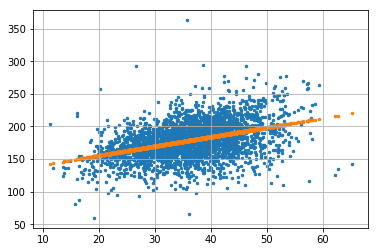

In [227]:
plt.scatter(X23, y, s=6)
plt.scatter(X23, lr.predict(X23), s=6)
plt.grid()

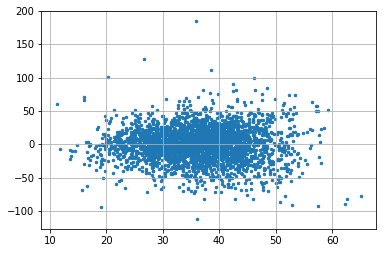

In [228]:
plt.scatter(X23, y - lr.predict(X23), s=6)
plt.grid()

In [229]:
X23.shape

(3047, 1)

In [230]:
dfx23 = pd.DataFrame(X23)
dfx23.head()

,0
0,43.8
1,37.4
2,36.7
3,23.7
4,38.0


In [231]:
dfx23['PctPublicCoverage_log'] = np.log(X23)

In [232]:
dfx23.head()

,0,PctPublicCoverage_log
0,43.8,3.779634
1,37.4,3.621671
2,36.7,3.602777
3,23.7,3.165475
4,38.0,3.637586


In [233]:
lr.fit(dfx23, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [234]:
lr.score(dfx23, y)

0.1650279558922968

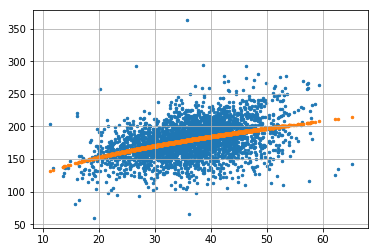

In [235]:
plt.scatter(X23, y, s=6) 
plt.scatter(X23, lr.predict(dfx23), s=6)
plt.grid()

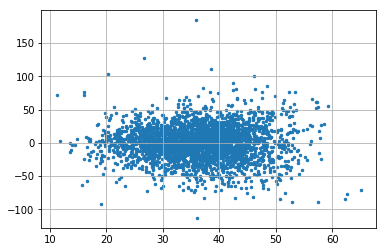

In [236]:
plt.scatter(X23, y - lr.predict(dfx23), s=6)
plt.grid()

In [237]:
dfx23['PctPublicCoverage_sqrd'] = X23**2

In [238]:
dfx23.head()

,0,PctPublicCoverage_log,PctPublicCoverage_sqrd
0,43.8,3.779634,1918.44
1,37.4,3.621671,1398.76
2,36.7,3.602777,1346.89
3,23.7,3.165475,561.69
4,38.0,3.637586,1444.00


In [239]:
lr.fit(dfx23, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [240]:
lr.score(dfx23, y)

0.16534683204489586

In [241]:
X['PctPublicCoverage_log'] = np.log(X['PctPublicCoverage'])

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [243]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [244]:
lr.score(X_test, y_test)

0.5766746129260198

The log version decreased the accuracy, so it is dropped from X.

In [247]:
X = X.drop(columns = 'PctPublicCoverage_log')

In [249]:
X['PctPublicCoverage_sqrd'] = X['PctPublicCoverage']**2

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [251]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [252]:
lr.score(X_test, y_test)

0.5733625894701511

There is a decrease with the squared version as well, so it is dropped from X.

In [253]:
X = X.drop(columns = 'PctPublicCoverage_sqrd')

## 'PctPublicCoverageAlone': Percent of county residents with government-provided health coverage alone

In [254]:
X24 = np.array(cancer['PctPublicCoverageAlone'])
X24 = X24.reshape(-1, 1)

In [255]:
lr.fit(X24, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [256]:
lr.score(X24, y)

0.20192223091567096

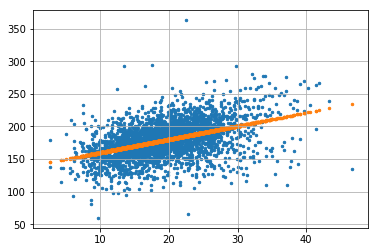

In [257]:
plt.scatter(X24, y, s=6)
plt.scatter(X24, lr.predict(X24), s=6)
plt.grid()

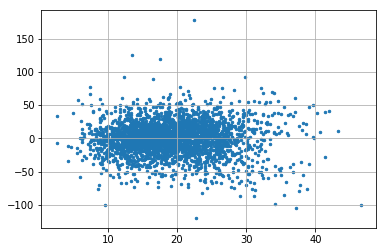

In [258]:
plt.scatter(X24, y - lr.predict(X24), s=6)
plt.grid()

In [259]:
X24.shape

(3047, 1)

In [260]:
dfx24 = pd.DataFrame(X24)
dfx24.head()

,0
0,25.9
1,23.1
2,18.4
3,11.1
4,14.2


In [261]:
dfx24['PctPublicCoverageAlone_log'] = np.log(X24)

In [262]:
dfx24.head()

,0,PctPublicCoverageAlone_log
0,25.9,3.254243
1,23.1,3.139833
2,18.4,2.912351
3,11.1,2.406945
4,14.2,2.653242


In [263]:
lr.fit(dfx24, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [264]:
lr.score(dfx24, y)

0.20391581149903748

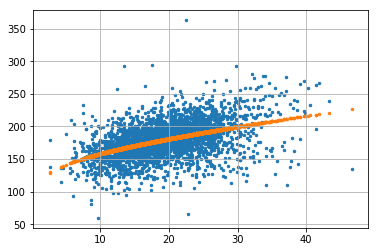

In [265]:
plt.scatter(X24, y, s=6) 
plt.scatter(X24, lr.predict(dfx24), s=6)
plt.grid()

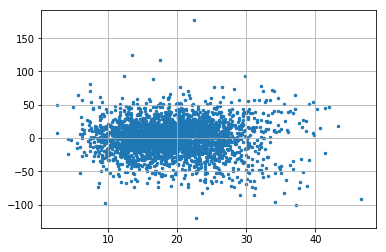

In [266]:
plt.scatter(X24, y - lr.predict(dfx24), s=6)
plt.grid()

In [267]:
dfx24['PctPublicCoverageAlone_sqrd'] = X24**2

In [268]:
dfx24.head()

,0,PctPublicCoverageAlone_log,PctPublicCoverageAlone_sqrd
0,25.9,3.254243,670.81
1,23.1,3.139833,533.61
2,18.4,2.912351,338.56
3,11.1,2.406945,123.21
4,14.2,2.653242,201.64


In [269]:
lr.fit(dfx24, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [270]:
lr.score(dfx24, y)

0.20542386560215975

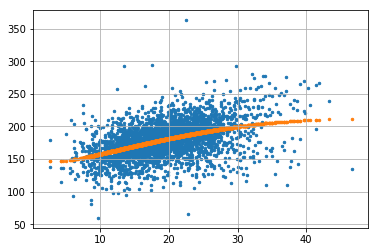

In [271]:
plt.scatter(X24, y, s=6) 
plt.scatter(X24, lr.predict(dfx24), s=6)
plt.grid()

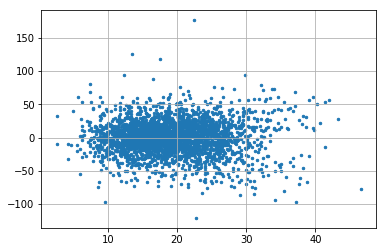

In [272]:
plt.scatter(X24, y - lr.predict(dfx24), s=6)
plt.grid()

In [273]:
X['PctPublicCoverageAlone_log'] = np.log(X['PctPublicCoverageAlone'])

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [275]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [276]:
lr.score(X_test, y_test)

0.5856973700340855

The logarithmic version resulted in an increase in accuracy, so it is added to the core feature set.

In [277]:
cancer['PctPublicCoverageAlone_log'] = np.log(cancer['PctPublicCoverageAlone'])

In [278]:
X['PctPublicCoverageAlone_sqrd'] = X['PctPublicCoverageAlone']**2

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [280]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [281]:
lr.score(X_test, y_test)

0.5795945478439783

The squared version decreased the accuracy, so it is dropped from X.

In [282]:
X = X.drop(columns = 'PctPublicCoverageAlone_sqrd')

## 'PctWhite': Percent of county residents who identify as White 

In [283]:
X25 = np.array(cancer['PctWhite'])
X25 = X25.reshape(-1, 1)

In [284]:
lr.fit(X25, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [285]:
lr.score(X25, y)

0.03147075300165392

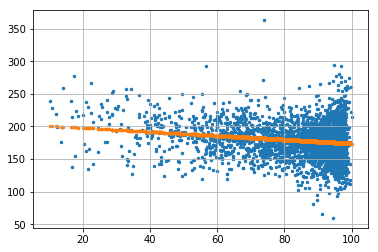

In [286]:
plt.scatter(X25, y, s=6)
plt.scatter(X25, lr.predict(X25), s=6)
plt.grid()

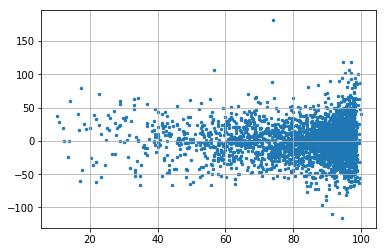

In [287]:
plt.scatter(X25, y - lr.predict(X25), s=6)
plt.grid()

In [288]:
X25.shape

(3047, 1)

In [289]:
dfx25 = pd.DataFrame(X25)
dfx25.head()

,0
0,69.888387
1,78.973023
2,68.008455
3,91.402416
4,98.464853


In [290]:
dfx25['PctWhite_log'] = np.log(X25)

In [291]:
dfx25.head()

,0,PctWhite_log
0,69.888387,4.246899
1,78.973023,4.369106
2,68.008455,4.219632
3,91.402416,4.515272
4,98.464853,4.589700


In [292]:
lr.fit(dfx25, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [293]:
lr.score(dfx25, y)

0.03634099004960267

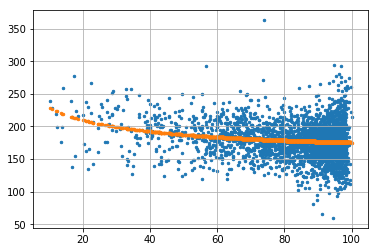

In [294]:
plt.scatter(X25, y, s=6) 
plt.scatter(X25, lr.predict(dfx25), s=6)
plt.grid()

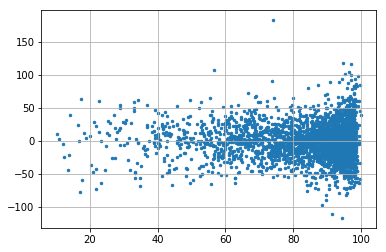

In [295]:
plt.scatter(X25, y - lr.predict(dfx25), s=6)
plt.grid()

In [296]:
dfx25['PctWhite_sqrd'] = X25**2

In [297]:
dfx25.head()

,0,PctWhite_log,PctWhite_sqrd
0,69.888387,4.246899,4884.386583
1,78.973023,4.369106,6236.738289
2,68.008455,4.219632,4625.150003
3,91.402416,4.515272,8354.401614
4,98.464853,4.589700,9695.327320


In [298]:
lr.fit(dfx25, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [299]:
lr.score(dfx25, y)

0.03891185517588547

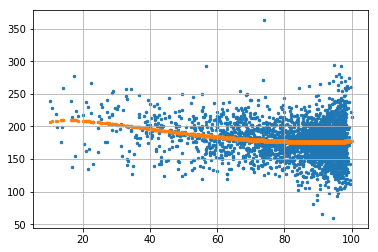

In [300]:
plt.scatter(X25, y, s=6) 
plt.scatter(X25, lr.predict(dfx25), s=6)
plt.grid()

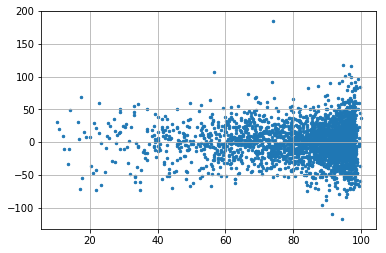

In [301]:
plt.scatter(X25, y - lr.predict(dfx25), s=6)
plt.grid()

In [302]:
X['PctWhite_log'] = np.log(X['PctWhite'])

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [304]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [305]:
lr.score(X_test, y_test)

0.5838370891870537

There is a decrease in accuracy with the logarithmic version, so it is dropped from X.

In [306]:
X = X.drop(columns = 'PctWhite_log')

In [307]:
X['PctWhite_sqrd'] = X['PctWhite']**2

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [309]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [310]:
lr.score(X_test, y_test)

0.5825167351996652

There is a drop in accuracy, so the squared version is dropped from X.

In [311]:
X = X.drop(columns = 'PctWhite_sqrd')

## 'PctBlack': Percent of county residents who identify as Black

In [312]:
X26 = np.array(cancer['PctBlack'])
X26 = X26.reshape(-1, 1)

In [313]:
lr.fit(X26, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [314]:
lr.score(X26, y)

0.06606111063384412

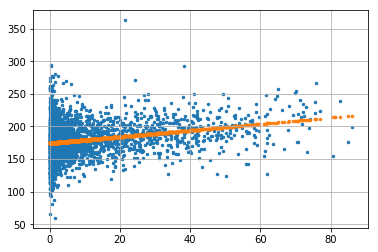

In [315]:
plt.scatter(X26, y, s=6)
plt.scatter(X26, lr.predict(X26), s=6)
plt.grid()

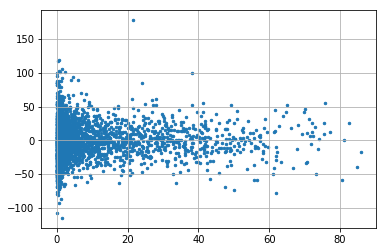

In [316]:
plt.scatter(X26, y - lr.predict(X26), s=6)
plt.grid()

In [317]:
X26.shape

(3047, 1)

In [318]:
dfx26 = pd.DataFrame(X26)
dfx26.head()

,0
0,27.947354
1,17.434808
2,28.675827
3,1.135566
4,0.363587


Because there are counties with no African-American residents, taking a logarithmic version of the 'PctBlack' feature will result in negative infinity values. Therefore, a logarithmic version of 'PctBlack' is not created.

In [319]:
dfx26['PctBlack_sqrd'] = X26**2

In [320]:
lr.fit(dfx26, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [321]:
lr.score(dfx26, y)

0.06677124525799338

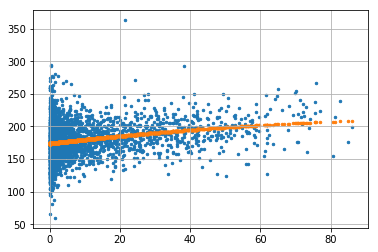

In [322]:
plt.scatter(X26, y, s=6) 
plt.scatter(X26, lr.predict(dfx26), s=6)
plt.grid()

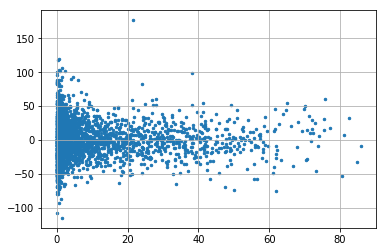

In [323]:
plt.scatter(X26, y - lr.predict(dfx26), s=6)
plt.grid()

In [324]:
X['PctBlack_sqrd'] = X['PctBlack']**2

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [326]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [327]:
lr.score(X_test, y_test)

0.5851783467996765

The squared version decreases the accuracy, so it is dropped from X.

In [328]:
X = X.drop(columns = 'PctBlack_sqrd')

## 'PctAsian': Percent of county residents who identify as Asian

In [329]:
X27 = np.array(cancer['PctAsian'])
X27 = X27.reshape(-1, 1)

In [330]:
lr.fit(X27, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [331]:
lr.score(X27, y)

0.03471928051248785

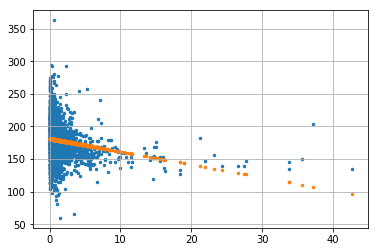

In [332]:
plt.scatter(X27, y, s=6)
plt.scatter(X27, lr.predict(X27), s=6)
plt.grid()

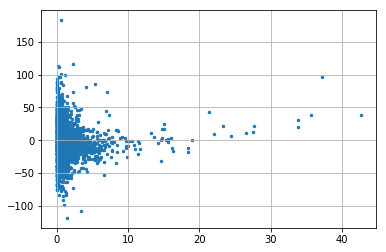

In [333]:
plt.scatter(X27, y - lr.predict(X27), s=6)
plt.grid()

In [334]:
X27.shape

(3047, 1)

In [335]:
dfx27 = pd.DataFrame(X27)
dfx27.head()

,0
0,0.000000
1,0.194650
2,0.144949
3,2.665143
4,0.323189


Because there are counties with no Asian residents, a logarithmic version is not created.

In [336]:
dfx27['PctAsian_sqrd'] = X27**2

In [337]:
lr.fit(dfx27, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [338]:
lr.score(dfx27, y)

0.04729003133733123

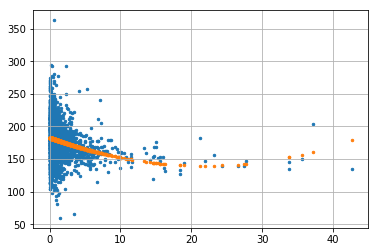

In [339]:
plt.scatter(X27, y, s=6) 
plt.scatter(X27, lr.predict(dfx27), s=6)
plt.grid()

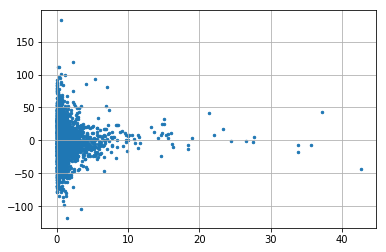

In [340]:
plt.scatter(X27, y - lr.predict(dfx27), s=6)
plt.grid()

In [341]:
X['PctAsian_sqrd'] = X['PctAsian']**2

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [343]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [344]:
lr.score(X_test, y_test)

0.580878210640458

The squared version decreases accuracy, so it is dropped from X.

In [345]:
X = X.drop(columns = 'PctAsian_sqrd')

## 'PctOtherRace': Percent of county residents who identify in a category which is not White, Black, or Asian

In [346]:
X28 = np.array(cancer['PctOtherRace'])
X28 = X28.reshape(-1, 1)

In [347]:
lr.fit(X28, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [348]:
lr.score(X28, y)

0.03605956833602919

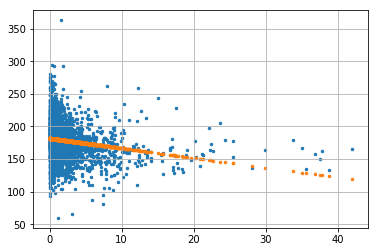

In [349]:
plt.scatter(X28, y, s=6)
plt.scatter(X28, lr.predict(X28), s=6)
plt.grid()

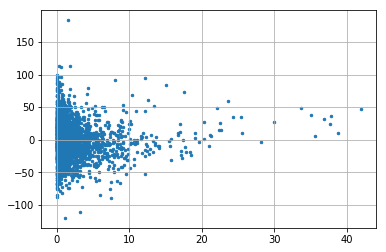

In [350]:
plt.scatter(X28, y - lr.predict(X28), s=6)
plt.grid()

In [351]:
X28.shape

(3047, 1)

In [352]:
dfx28 = pd.DataFrame(X28)
dfx28.head()

,0
0,0.240029
1,1.000595
2,1.322663
3,1.284308
4,0.175061


Because there are counties with no people who identify as a race other than white, black, or Asian, a logarithmic version is not created.

In [353]:
dfx28['PctOtherRace_sqrd'] = X28**2

In [354]:
lr.fit(dfx28, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [355]:
lr.score(dfx28, y)

0.04813520780689606

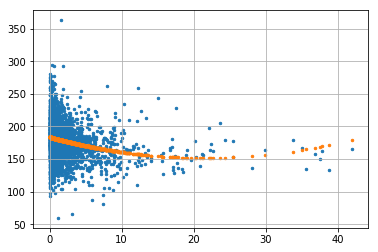

In [356]:
plt.scatter(X28, y, s=6) 
plt.scatter(X28, lr.predict(dfx28), s=6)
plt.grid()

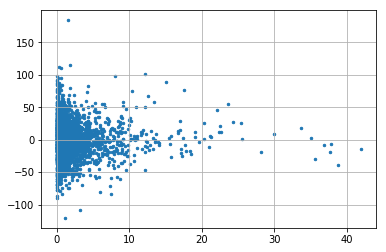

In [357]:
plt.scatter(X28, y - lr.predict(dfx28), s=6)
plt.grid()

In [358]:
X['PctOtherRace_sqrd'] = X['PctOtherRace']**2

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [360]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [361]:
lr.score(X_test, y_test)

0.5829367638842922

The squared version resulted in a drop in accuracy, so it is dropped from X.

In [362]:
X = X.drop(columns = 'PctOtherRace_sqrd')

## 'PctMarriedHouseholds': Percent of married households

In [363]:
X29 = np.array(cancer['PctMarriedHouseholds'])
X29 = X29.reshape(-1, 1)

In [364]:
lr.fit(X29, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [365]:
lr.score(X29, y)

0.08603975538538533

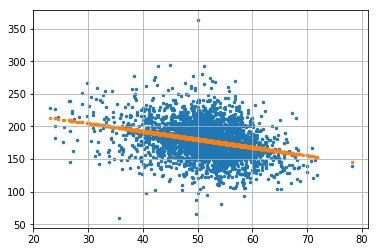

In [366]:
plt.scatter(X29, y, s=6)
plt.scatter(X29, lr.predict(X29), s=6)
plt.grid()

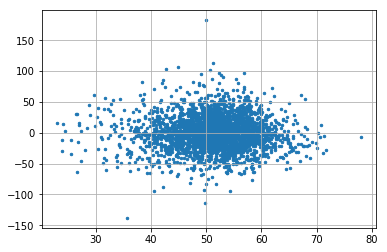

In [367]:
plt.scatter(X29, y - lr.predict(X29), s=6)
plt.grid()

In [368]:
X29.shape

(3047, 1)

In [369]:
dfx29 = pd.DataFrame(X29)
dfx29.head()

,0
0,47.299697
1,47.095004
2,47.467946
3,52.607352
4,51.625890


In [370]:
dfx29['PctMarriedHouseholds_log'] = np.log(X29)

In [371]:
dfx29.head()

,0,PctMarriedHouseholds_log
0,47.299697,3.856504
1,47.095004,3.852167
2,47.467946,3.860055
3,52.607352,3.962856
4,51.625890,3.944023


In [372]:
lr.fit(dfx29, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [373]:
lr.score(dfx29, y)

0.08817378372185536

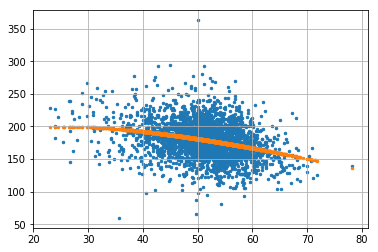

In [374]:
plt.scatter(X29, y, s=6) 
plt.scatter(X29, lr.predict(dfx29), s=6)
plt.grid()

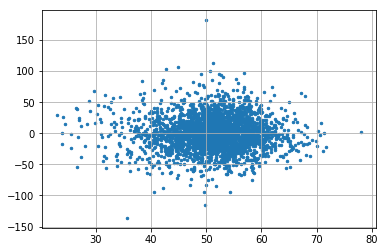

In [375]:
plt.scatter(X29, y - lr.predict(dfx29), s=6)
plt.grid()

In [376]:
dfx29['PctMarriedHouseholds_sqrd'] = X29**2

In [377]:
dfx29.head()

,0,PctMarriedHouseholds_log,PctMarriedHouseholds_sqrd
0,47.299697,3.856504,2237.261342
1,47.095004,3.852167,2217.939421
2,47.467946,3.860055,2253.205937
3,52.607352,3.962856,2767.533507
4,51.625890,3.944023,2665.232556


In [378]:
lr.fit(dfx29, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [379]:
lr.score(dfx29, y)

0.09156686620624266

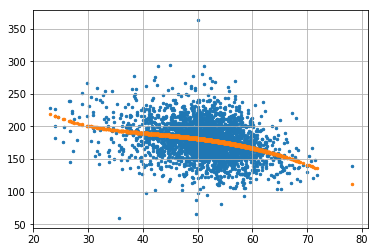

In [380]:
plt.scatter(X29, y, s=6) 
plt.scatter(X29, lr.predict(dfx29), s=6)
plt.grid()

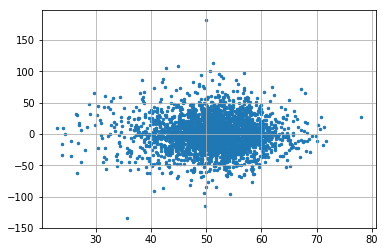

In [381]:
plt.scatter(X29, y - lr.predict(dfx29), s=6)
plt.grid()

In [382]:
X['PctMarriedHouseholds_log'] = np.log(X['PctMarriedHouseholds'])

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [384]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [385]:
lr.score(X_test, y_test)

0.572345136624769

The logarithmic version resulted in a drop in accuracy, so it is dropped from X.

In [386]:
X = X.drop(columns = 'PctMarriedHouseholds_log')

In [387]:
X['PctMarriedHouseholds_sqrd'] = X['PctMarriedHouseholds']**2

In [388]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [389]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [390]:
lr.score(X_test, y_test)

0.5782801627518279

The squared version resulted in a drop in accuracy as well, so it is dropped.

In [391]:
X = X.drop(columns = 'PctMarriedHouseholds_sqrd')

## 'BirthRate': Number of live births relative to number of women in county

In [392]:
X30 = np.array(cancer['BirthRate'])
X30 = X30.reshape(-1, 1)

In [393]:
lr.fit(X30, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [394]:
lr.score(X30, y)

0.0076399783767386875

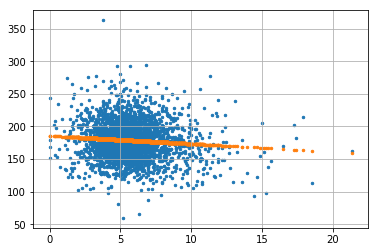

In [395]:
plt.scatter(X30, y, s=6)
plt.scatter(X30, lr.predict(X30), s=6)
plt.grid()

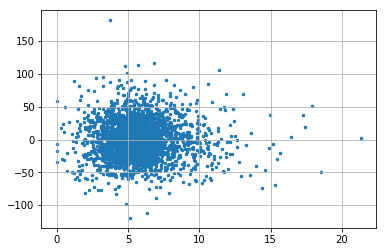

In [396]:
plt.scatter(X30, y - lr.predict(X30), s=6)
plt.grid()

In [397]:
X30.shape

(3047, 1)

In [398]:
dfx30 = pd.DataFrame(X30)
dfx30.head()

,0
0,5.823784
1,6.938636
2,4.349749
3,4.783516
4,4.989154


There are counties with zero birthrate, so a logarithmic version cannot be used and is not created.

In [399]:
dfx30['BirthRate_sqrd'] = X30**2

In [400]:
lr.fit(dfx30, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [401]:
lr.score(dfx30, y)

0.009309642644010352

In [402]:
X['BirthRate_sqrd'] = X['BirthRate']**2

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [404]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [405]:
lr.score(X_test, y_test)

0.585770835917346

The squared version resulted in an increase in accuracy, so it is added to the core feature set.

In [406]:
cancer['BirthRate_sqrd'] = cancer['BirthRate']**2

## 'ALAND_SQMI': Land Area in Square Miles of Each County

In [407]:
X31 = np.array(cancer['ALAND_SQMI'])
X31 = X31.reshape(-1, 1)

In [408]:
lr.fit(X31, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [409]:
lr.score(X31, y)

0.0007990921724215783

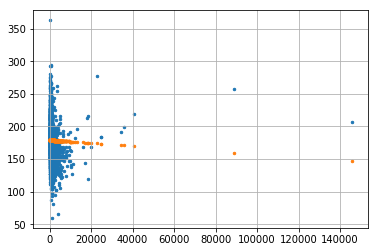

In [410]:
plt.scatter(X31, y, s=6)
plt.scatter(X31, lr.predict(X31), s=6)
plt.grid()

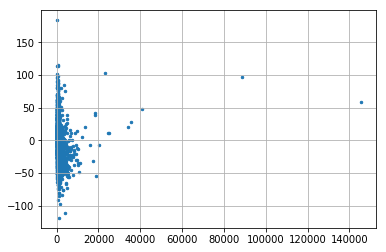

In [411]:
plt.scatter(X31, y - lr.predict(X31), s=6)
plt.grid()

In [412]:
X31.shape

(3047, 1)

In [413]:
dfx31 = pd.DataFrame(X31)
dfx31.head()

,0
0,491.427
1,655.169
2,449.310
3,1052.013
4,569.271


In [414]:
dfx31['ALAND_SQMI_log'] = np.log(X31)

In [415]:
dfx31.head()

,0,ALAND_SQMI_log
0,491.427,6.197313
1,655.169,6.484893
2,449.310,6.107713
3,1052.013,6.958461
4,569.271,6.344357


In [416]:
lr.fit(dfx31, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [417]:
lr.score(dfx31, y)

0.0686639780297228

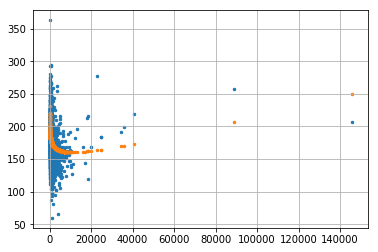

In [418]:
plt.scatter(X31, y, s=6) 
plt.scatter(X31, lr.predict(dfx31), s=6)
plt.grid()

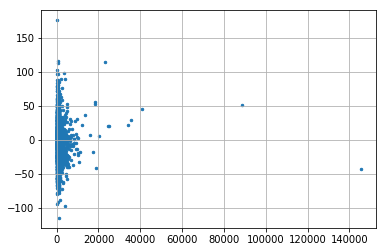

In [419]:
plt.scatter(X31, y - lr.predict(dfx31), s=6)
plt.grid()

In [420]:
dfx31['ALAND_SQMI_sqrd'] = X31**2

In [421]:
dfx31.head()

,0,ALAND_SQMI_log,ALAND_SQMI_sqrd
0,491.427,6.197313,2.415005e+05
1,655.169,6.484893,4.292464e+05
2,449.310,6.107713,2.018795e+05
3,1052.013,6.958461,1.106731e+06
4,569.271,6.344357,3.240695e+05


In [422]:
lr.fit(dfx31, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [423]:
lr.score(dfx31, y)

0.06914184295933845

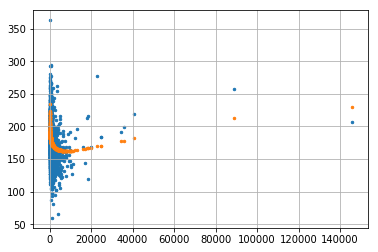

In [424]:
plt.scatter(X31, y, s=6) 
plt.scatter(X31, lr.predict(dfx31), s=6)
plt.grid()

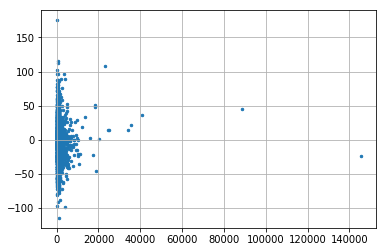

In [425]:
plt.scatter(X31, y - lr.predict(dfx31), s=6)
plt.grid()

In [426]:
X['ALAND_SQMI_log'] = np.log(X['ALAND_SQMI'])

In [427]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [428]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [429]:
lr.score(X_test, y_test)

0.5832058044416317

The logarithmic version resulted in a slight decrease in accuracy, so it is dropped from X.

In [430]:
X = X.drop(columns = 'ALAND_SQMI_log')

In [431]:
X['ALAND_SQMI_sqrd'] = X['ALAND_SQMI']**2

In [432]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [433]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [434]:
lr.score(X_test, y_test)

0.5513462387000662

The squared version of the variable resulted in a drop in accuracy, so it is dropped from X.

In [435]:
X = X.drop(columns = 'ALAND_SQMI_sqrd')

## AWATER_SQMI: Water Area in Square Miles of Each County

In [436]:
X32 = np.array(cancer['AWATER_SQMI'])
X32 = X32.reshape(-1, 1)

In [437]:
lr.fit(X32, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [438]:
lr.score(X32, y)

9.376780132130946e-05

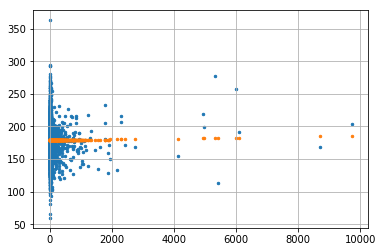

In [439]:
plt.scatter(X32, y, s=6)
plt.scatter(X32, lr.predict(X32), s=6)
plt.grid()

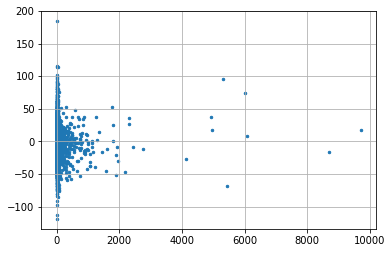

In [440]:
plt.scatter(X32, y - lr.predict(X32), s=6)
plt.grid()

In [441]:
X32.shape

(3047, 1)

In [442]:
dfx32 = pd.DataFrame(X32)
dfx32.head()

,0
0,20.554
1,2.285
2,860.729
3,8.558
4,1.003


There are counties with no water area, so a logarithmic version of 'AWATER_SQMI' is not created, as values of zero will have a log value of negative infinity, a value unuseable by the linear regression algorithm.

In [443]:
dfx32['AWATER_SQMI_sqrd'] = X32**2

In [444]:
lr.fit(dfx32, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [445]:
lr.score(dfx32, y)

0.0018773493110340045

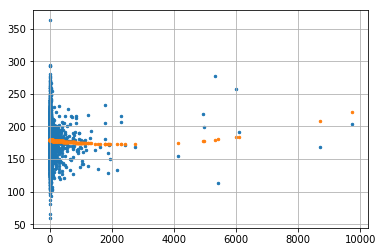

In [446]:
plt.scatter(X32, y, s=6) 
plt.scatter(X32, lr.predict(dfx32), s=6)
plt.grid()

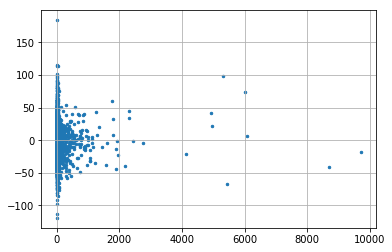

In [447]:
plt.scatter(X32, y - lr.predict(dfx32), s=6)
plt.grid()

In [448]:
X['AWATER_SQMI_sqrd'] = X['AWATER_SQMI']**2

In [449]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [450]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [451]:
lr.score(X_test, y_test)

0.5600080545230458

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [452]:
X = X.drop(columns = 'AWATER_SQMI_sqrd')

## 'INTPTLAT': Latitude of County Centroid

In [453]:
X33 = np.array(cancer['INTPTLAT'])
X33 = X33.reshape(-1, 1)

In [454]:
lr.fit(X33, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [455]:
lr.score(X33, y)

0.03391661520456468

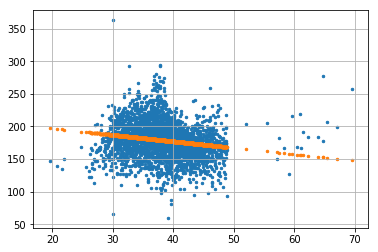

In [456]:
plt.scatter(X33, y, s=6)
plt.scatter(X33, lr.predict(X33), s=6)
plt.grid()

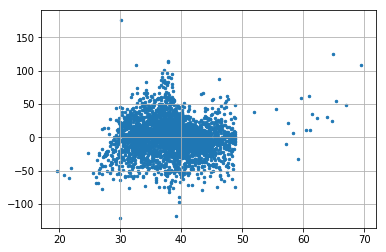

In [457]:
plt.scatter(X33, y - lr.predict(X33), s=6)
plt.grid()

In [458]:
X33.shape

(3047, 1)

In [459]:
dfx33 = pd.DataFrame(X33)
dfx33.head()

,0
0,34.229041
1,30.291497
2,37.765944
3,43.451477
4,41.328528


In [460]:
dfx33['INTPTLAT_log'] = np.log(X33)

In [461]:
dfx33.head()

,0,INTPTLAT_log
0,34.229041,3.533074
1,30.291497,3.410867
2,37.765944,3.631408
3,43.451477,3.771645
4,41.328528,3.721553


In [462]:
lr.fit(dfx33, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [463]:
lr.score(dfx33, y)

0.0365324331592668

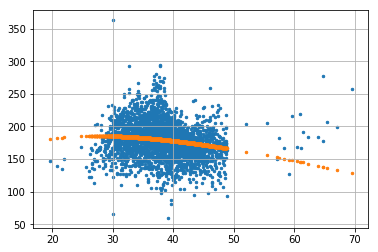

In [464]:
plt.scatter(X33, y, s=6) 
plt.scatter(X33, lr.predict(dfx33), s=6)
plt.grid()

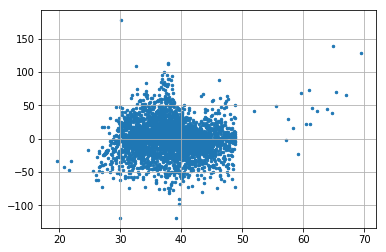

In [465]:
plt.scatter(X33, y - lr.predict(dfx33), s=6)
plt.grid()

In [466]:
dfx33['INTPTLAT_sqrd'] = X33**2

In [467]:
dfx33.head()

,0,INTPTLAT_log,INTPTLAT_sqrd
0,34.229041,3.533074,1171.627248
1,30.291497,3.410867,917.574791
2,37.765944,3.631408,1426.266526
3,43.451477,3.771645,1888.030853
4,41.328528,3.721553,1708.047227


In [468]:
lr.fit(dfx33, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [469]:
lr.score(dfx33, y)

0.0917703499894833

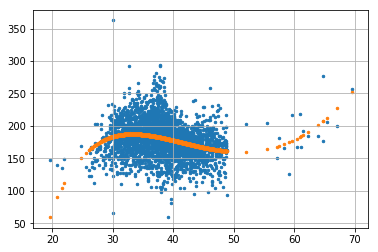

In [470]:
plt.scatter(X33, y, s=6) 
plt.scatter(X33, lr.predict(dfx33), s=6)
plt.grid()

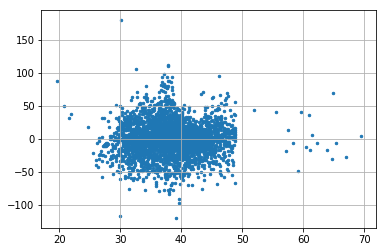

In [471]:
plt.scatter(X33, y - lr.predict(dfx33), s=6)
plt.grid()

In [472]:
X['INTPTLAT_log'] = np.log(X['INTPTLAT'])

In [473]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [474]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [475]:
lr.score(X_test, y_test)

0.5847638194695944

The logarithmic version results in a drop in accuracy, so it is dropped from X.

In [476]:
X = X.drop(columns = 'INTPTLAT_log')

In [477]:
X['INTPTLAT_sqrd'] = X['INTPTLAT']**2

In [478]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [479]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [480]:
lr.score(X_test, y_test)

0.5836899477091271

The squared version decreased the accuracy, so it is dropped from X.

In [481]:
X = X.drop(columns = 'INTPTLAT_sqrd')

## 'INTPTLONG': Longitude of County Centroids

In [482]:
X34 = np.array(cancer['INTPTLONG'])
X34 = X34.reshape(-1, 1)

In [483]:
lr.fit(X34, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [484]:
lr.score(X34, y)

0.07129463549503168

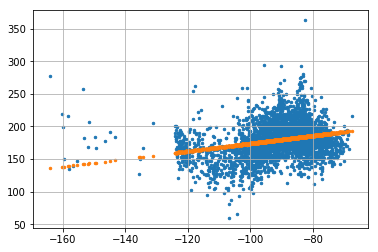

In [485]:
plt.scatter(X34, y, s=6)
plt.scatter(X34, lr.predict(X34), s=6)
plt.grid()

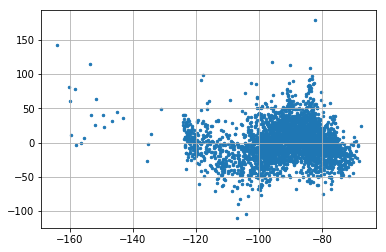

In [486]:
plt.scatter(X34, y - lr.predict(X34), s=6)
plt.grid()

In [487]:
X34.shape

(3047, 1)

In [488]:
dfx34 = pd.DataFrame(X34)
dfx34.head()

,0
0,-82.454058
1,-92.411037
2,-75.757807
3,-116.244376
4,-94.478164


There are negative values in this longitude feature, so a log version cannot be created.

In [493]:
dfx34['INTPTLONG_sqrd'] = X34**2

In [494]:
dfx34.head()

,0,INTPTLONG_sqrd
0,-82.454058,6798.671681
1,-92.411037,8539.799759
2,-75.757807,5739.245321
3,-116.244376,13512.754952
4,-94.478164,8926.123473


In [495]:
lr.fit(dfx34, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [496]:
lr.score(dfx34, y)

0.07417565836915352

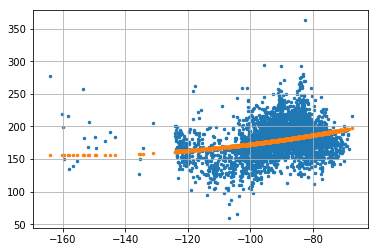

In [497]:
plt.scatter(X34, y, s=6) 
plt.scatter(X34, lr.predict(dfx34), s=6)
plt.grid()

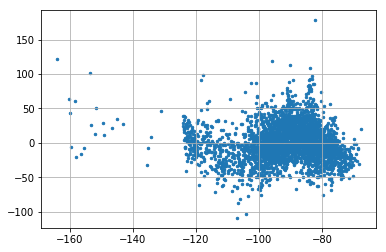

In [498]:
plt.scatter(X34, y - lr.predict(dfx34), s=6)
plt.grid()

In [499]:
X['INTPTLONG_sqrd'] = X['INTPTLONG']**2

In [500]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [501]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [502]:
lr.score(X_test, y_test)

0.5976555625296656

The squared version resulted in an increase in accuracy, so it is added to the core feature set.

In [503]:
cancer['INTPTLONG_sqrd'] = cancer['INTPTLONG']**2

## 'utmda_l1': L1 distance of county centroids from University of Texas MD Anderson Cancer Center

In [504]:
X35 = np.array(cancer['utmda_l1'])
X35 = X35.reshape(-1, 1)

In [505]:
lr.fit(X35, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [506]:
lr.score(X35, y)

0.020568400326232084

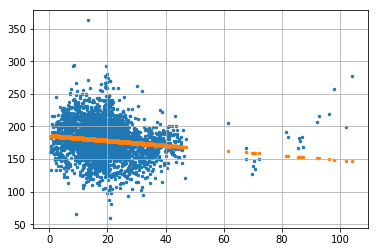

In [507]:
plt.scatter(X35, y, s=6)
plt.scatter(X35, lr.predict(X35), s=6)
plt.grid()

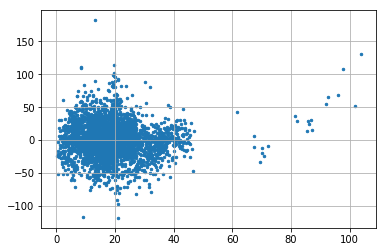

In [508]:
plt.scatter(X35, y - lr.predict(X35), s=6)
plt.grid()

In [509]:
X35.shape

(3047, 1)

In [510]:
dfx35 = pd.DataFrame(X35)
dfx35.head()

,0
0,17.464583
1,3.570060
2,27.697737
3,34.590653
4,12.539964


In [511]:
dfx35['utmda_l1_log'] = np.log(X35)

In [512]:
dfx35.head()

,0,utmda_l1_log
0,17.464583,2.860175
1,3.570060,1.272582
2,27.697737,3.321351
3,34.590653,3.543584
4,12.539964,2.528921


In [513]:
lr.fit(dfx35, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [514]:
lr.score(dfx35, y)

0.0223638758684932

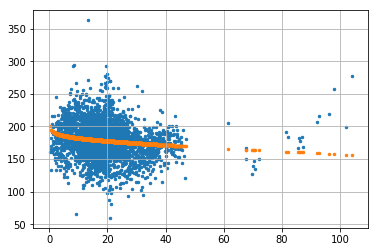

In [515]:
plt.scatter(X35, y, s=6) 
plt.scatter(X35, lr.predict(dfx35), s=6)
plt.grid()

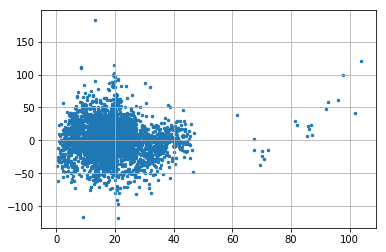

In [516]:
plt.scatter(X35, y - lr.predict(dfx35), s=6)
plt.grid()

In [517]:
dfx35['utmda_l1_sqrd'] = X35**2

In [518]:
dfx35.head()

,0,utmda_l1_log,utmda_l1_sqrd
0,17.464583,2.860175,305.011659
1,3.570060,1.272582,12.745328
2,27.697737,3.321351,767.164635
3,34.590653,3.543584,1196.513275
4,12.539964,2.528921,157.250697


In [519]:
lr.fit(dfx35, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [520]:
lr.score(dfx35, y)

0.04460489632998599

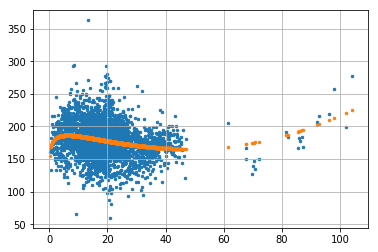

In [521]:
plt.scatter(X35, y, s=6) 
plt.scatter(X35, lr.predict(dfx35), s=6)
plt.grid()

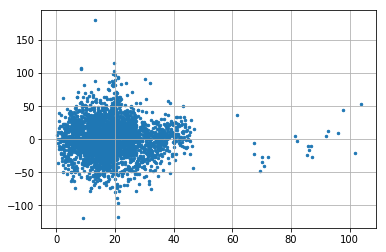

In [522]:
plt.scatter(X35, y - lr.predict(dfx35), s=6)
plt.grid()

In [523]:
X['utmda_l1_log'] = np.log(X['utmda_l1'])

In [524]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [525]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [526]:
lr.score(X_test, y_test)

0.5964927069772058

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [527]:
X = X.drop(columns = 'utmda_l1_log')

In [528]:
X['utmda_l1_sqrd'] = X['utmda_l1']**2

In [529]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [530]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [531]:
lr.score(X_test, y_test)

0.5953461503217092

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [532]:
X = X.drop(columns = 'utmda_l1_sqrd')

In [533]:
cancer.to_csv('cancer_ml4.csv')